# Maps part II

files needed = ('cb_2017_55_tract_500k.shp', 'ACS_16_5YR_B27001_with_ann.csv')

We continue working with maps. Today we learn about Census tracts and think about how to call out missing data on a map. Along the way, we will look into the American Communities Survey data. 

In [54]:
import pandas as pd                         # pandas for data management
import geopandas                            # geopandas for maps work
import matplotlib.pyplot as plt             # matplotlib for plotting details                     

### Census tracts
Let's take our level of analysis down to the [Census tract](https://factfinder.census.gov/help/en/census_tract.htm). A tract is about the equivalent of a neighborhood. Its shape is 'relatively permanent' but will change occasionally. A tract holds about 4,000 inhabitants on average.   

We can find the shapefiles for Census tracts at [https://www.census.gov/geo/maps-data/data/cbf/cbf_tracts.html](https://www.census.gov/geo/maps-data/data/cbf/cbf_tracts.html).

Download the Wisconsin country shapefiles and extract the zipped file to your cwd. 

In [55]:
# Read the file into a GeoDataFrame. Note that Wisconsin's FIPS code is 55.
tracts = geopandas.read_file('cb_2017_55_tract_500k/cb_2017_55_tract_500k.shp')
print(tracts.head(3))
print(tracts.geometry.name)
print(tracts.shape)

  STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID  NAME LSAD  \
0      55      003  950300  1400000US55003950300  55003950300  9503   CT   
1      55      009  000500  1400000US55009000500  55009000500     5   CT   
2      55      009  000800  1400000US55009000800  55009000800     8   CT   

     ALAND  AWATER                                           geometry  
0  5626301   63299  POLYGON ((-90.89532699999999 46.588375, -90.89...  
1  1166417       0  POLYGON ((-88.04363499999999 44.521185, -88.04...  
2  2083821  341424  POLYGON ((-88.042208 44.496547, -88.034773 44....  
geometry
(1396, 10)


We have several codes (state, county, tract), square meters of land (ALAND) and water (AWATER), and the geometry data for each tract. There are 1,396 tracts in the data. Let's take a look.

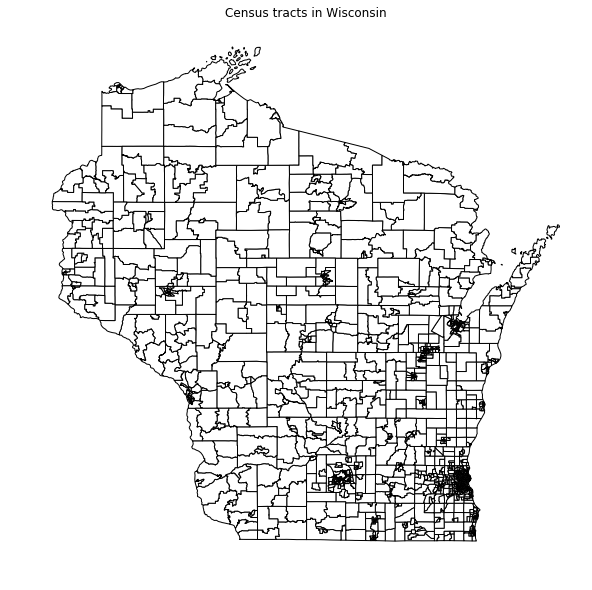

In [56]:
fig, gax = plt.subplots(figsize = (10, 10))

tracts.plot(ax=gax, edgecolor='black', color='white')

gax.set_title('Census tracts in Wisconsin')

gax.axis('off')

plt.show()

Just looking at the map with the tracts give you a pretty good idea where most of the population lives. 

## Practice

Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

1. Zoom in on Dane county --- only plot the tracts in Dane county. Dane's county code is 025. 

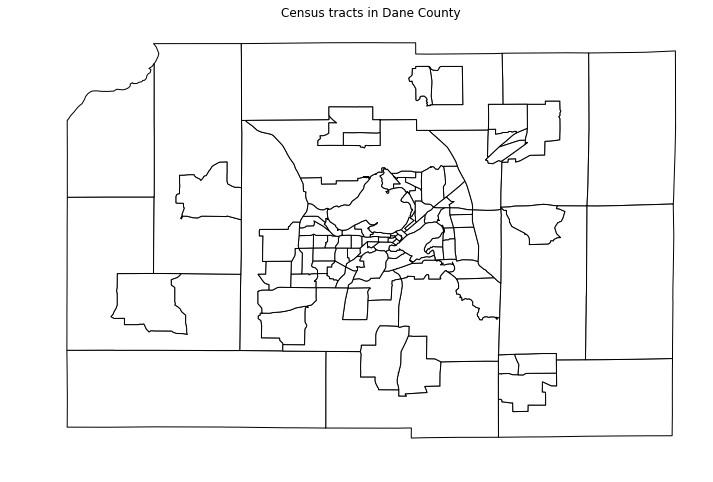

In [57]:
fig, gax = plt.subplots(figsize = (12, 8))

tracts[tracts.COUNTYFP == "025"].plot(ax=gax, edgecolor='black', color='white')
gax.set_title('Census tracts in Dane County')
gax.axis('off')

plt.show()

2. Madison's defining geographic feature is its lakes. Color the lakes in blue. \[Hint: Look for tracts with no land area.\]

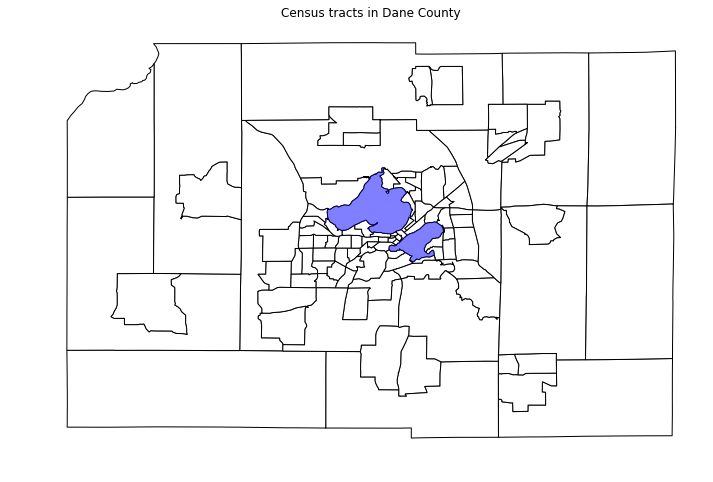

In [58]:
fig, gax = plt.subplots(figsize = (12, 8))

tracts[tracts.COUNTYFP == "025"].plot(ax=gax, edgecolor='black', color='white')
tracts.loc[tracts[(tracts.COUNTYFP == "025") & (tracts.ALAND == 0)].index, :].plot(ax=gax, color='blue', alpha = .5)
gax.set_title('Census tracts in Dane County')
gax.axis('off')

plt.show()

### American Community Survey
The ACS is a survey that collects data that used to be collected on the 'long-form' U.S. census. This includes data about a household's demographics, income, ancestry, education,...

Data are collected on individual households, but the data are confidential. The individual data are aggregated to provide confidentiality when reported. For large areas (states, large counties) data are available at one-year intervals. For smaller areas, such as census tracts or block groups, data are available at five-year intervals.

An easy place to find the ACS data is the Census 'American Fact Finder.' Go to [https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml) and choose 'advanced search.'

I have already downloaded files on insurance coverage by age and gender. The file 'ACS_16_5YR_B27001_with_ann.csv' has the data.

In [59]:
ins = pd.read_csv('ACS_16_5YR_B27001_with_ann.csv')
print(ins.head())
print(ins.shape)

                 GEO.id      GEO.id2  \
0  1400000US55001950100  55001950100   
1  1400000US55001950201  55001950201   
2  1400000US55001950202  55001950202   
3  1400000US55001950400  55001950400   
4  1400000US55001950501  55001950501   

                               GEO.display-label  HD01_VD01  HD02_VD01  \
0     Census Tract 9501, Adams County, Wisconsin       2935         63   
1  Census Tract 9502.01, Adams County, Wisconsin       1343        126   
2  Census Tract 9502.02, Adams County, Wisconsin       2581        156   
3     Census Tract 9504, Adams County, Wisconsin       4389        271   
4  Census Tract 9505.01, Adams County, Wisconsin       1511        150   

   HD01_VD02  HD02_VD02  HD01_VD03  HD02_VD03  HD01_VD04    ...      \
0       1504         83         79         38         79    ...       
1        676         73         18         14         18    ...       
2       1414         99         22         14         22    ...       
3       2168        174       

That is a lot of data. We can find the variable names in 'ACS_16_5YR_B27001_metadata.csv'.


Let's just keep the data for 18-24 year olds. Keep the total count and those with insurance. We can work out the count without insurance. 

In [60]:
# Keep just these variables
vars_to_keep = ['GEO.id2', 'HD01_VD09', 'HD01_VD10', 'HD01_VD37', 'HD01_VD38']
ins = ins[vars_to_keep]

In [61]:
# Rename them to something sensible. I can imagine setting up this data frame with a separate column for gender 
# and simplifying the variable names. 
ins = ins.rename(columns={'HD01_VD09':'m1824_total', 'HD01_VD10':'m1824_wins',
                          'HD01_VD37':'f1824_total', 'HD01_VD38':'f1824_wins'})
ins.head(3)

,GEO.id2,m1824_total,m1824_wins,f1824_total,f1824_wins
0,55001950100,30,22,33,31
1,55001950201,25,25,49,42
2,55001950202,46,31,55,40


### Merge the geography data with the ACS data
We can merge this data with the shapefiles from earlier. The GEOid fields make this very easy. First, let's make sure the data are ready to be merged.

In [62]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 5 columns):
GEO.id2        1409 non-null int64
m1824_total    1409 non-null int64
m1824_wins     1409 non-null int64
f1824_total    1409 non-null int64
f1824_wins     1409 non-null int64
dtypes: int64(5)
memory usage: 55.1 KB


In [63]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 10 columns):
STATEFP     1396 non-null object
COUNTYFP    1396 non-null object
TRACTCE     1396 non-null object
AFFGEOID    1396 non-null object
GEOID       1396 non-null object
NAME        1396 non-null object
LSAD        1396 non-null object
ALAND       1396 non-null int64
AWATER      1396 non-null int64
geometry    1396 non-null object
dtypes: int64(2), object(8)
memory usage: 109.1+ KB


In [64]:
# The GEOID data were stored as strings. Fix it.
tracts['GEOID'] = tracts['GEOID'].astype(float)

# Now merge. I am using a right merge, since there seem to be more insurance data than tracts?
ins_tracts = pd.merge(left=ins, right=tracts, left_on='GEO.id2', right_on='GEOID', how='right')

Create a variable that holds the share of people aged 18-24 without insurance. 

In [65]:
ins_tracts['unins'] =  1-(ins_tracts['m1824_wins'] + ins_tracts['f1824_wins']) / (ins_tracts['m1824_total'] + ins_tracts['f1824_total'])

Before we can plot, we need to turn the DataFrame into a GeoDataFrame.

In [66]:
# What do we have?
print(type(ins_tracts))        

# Create a GeoDataFrame by passing a DataFrame and calling out a geometry
ins_tracts = geopandas.GeoDataFrame(ins_tracts, geometry = 'geometry')

# What do we have now?
print(type(ins_tracts))

<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [67]:
ins_tracts['unins'].describe()

count    1391.000000
mean        0.146873
std         0.120696
min         0.000000
25%         0.058489
50%         0.122616
75%         0.205334
max         0.714286
Name: unins, dtype: float64

## Practice

1. Plot the uninsured rate for each census tract in Wisconsin. 


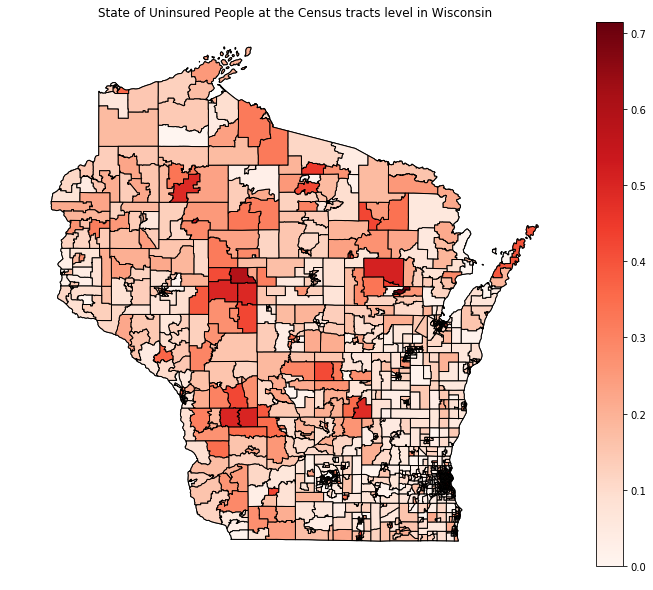

In [73]:
fig, gax = plt.subplots(figsize = (12, 10))

tracts.plot(ax = gax, edgecolor = 'black', color = 'white')
ins_tracts[ins_tracts.unins >= 0].plot(ax = gax, edgecolor = "black", column = "unins", legend = True, cmap = "Reds")
gax.set_title('State of Uninsured People at the Census tracts level in Wisconsin')
gax.axis('off')

plt.show()

Does your map look correct? Did you get an error message? The problem is that a few of the shape files do not have data associated with them. \[How could you figure that out?\] These missing values are causing problems. 

Try plotting only the census tracts that have `ins_tracts['unins']>=0`.

Go back and fix up your code.

We want to mark the census tracts with missing data with hashed lines. If we do not mark them, they will have the background color, and could be mistaken for tracts with unins = 0.

2. Start by plotting all the tracts with `ins_tracts['unins']>=0` for Dane county. 

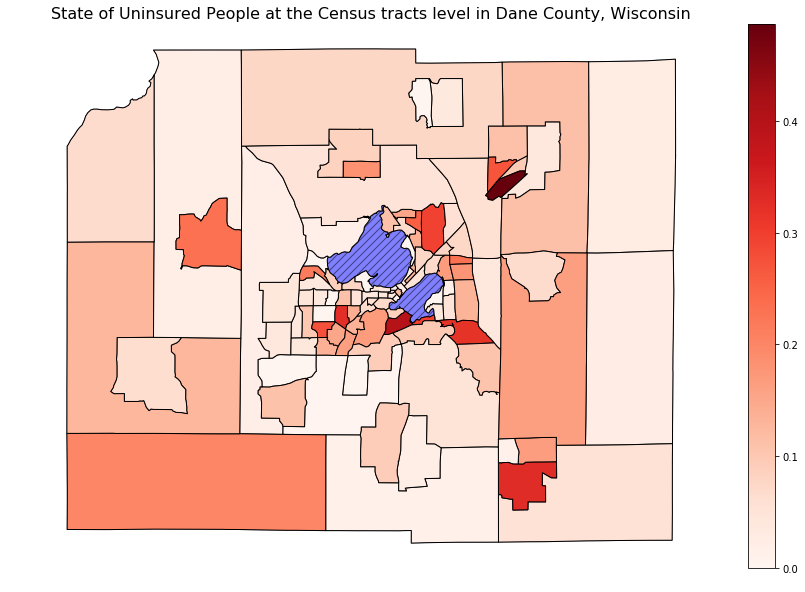

In [74]:
tracts_dane = tracts[tracts.COUNTYFP == "025"]

fig, gax = plt.subplots(figsize = (15, 10))

tracts_dane.plot(ax = gax, edgecolor = 'black', hatch="///", color="blue", alpha = .5)
# The hatched areas represent lakes in Dane County
ins_tracts.loc[ins_tracts[(ins_tracts.unins >= 0) & (ins_tracts.COUNTYFP == "025")].index, :].plot(ax = gax, edgecolor = "black", column = "unins", legend = True, cmap = "Reds")
gax.set_title('State of Uninsured People at the Census tracts level in Dane County, Wisconsin', fontsize = 16)
gax.axis('off')

plt.show()

3. Now, go back and add to your plot, a 'hatched' grey for the areas without data. Something like
````python
.plot(ax=gax, hatch='///', color='grey')
```
called on the set of tracts in Dane county that do not have data \[More subsetting!\]. Why might you want to make the hashed areas blue?